In [109]:
### Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_df = "Mouse_metadata.csv"
study_df = "Study_results.csv"

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse_df)
study_df = pd.read_csv(study_df)

# Combine the data into a single dataset

In [16]:
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [24]:
#merge data by outer to get drug treatment with the clinical data
merge_table=pd.merge(study_df,mouse_df,on='Mouse ID',how='outer')
merge.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [23]:
mouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
Mouse ID        249 non-null object
Drug Regimen    249 non-null object
Sex             249 non-null object
Age_months      249 non-null int64
Weight (g)      249 non-null int64
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

mean = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

grouped_df = pd.DataFrame(merge_table.groupby(["Drug Regimen"]).count()).reset_index()
# Filter the DataFrame down only to those columns to chart
regimen_datapoints = grouped_df[["Drug Regimen","Mouse ID"]]
regimen_datapoints = regimen_datapoints.rename(columns={"Mouse ID": "Count"})
# Set the index to be "Drug Regimen" so they will be used as labels
regimen_datapoints = regimen_datapoints.set_index("Drug Regimen")

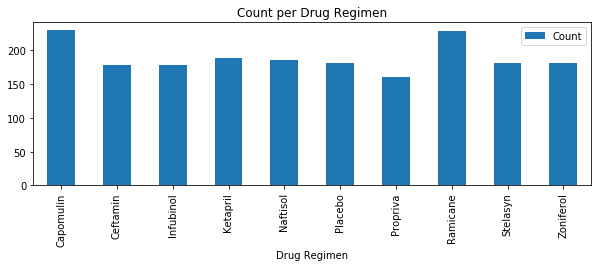

<Figure size 432x288 with 0 Axes>

In [37]:
# Use DataFrame.plot() in order to create a bar chart of the data
regimen_datapoints.plot(kind="bar", figsize=(10,3))

# Set a title for the chart
plt.title("Count per Drug Regimen")

plt.show()
plt.tight_layout()

In [39]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# select column to convert to list here
drug_regimens = summary_df.index.tolist()
drug_regimens

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [41]:
regimen_count = (merge_table.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
regimen_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

In [44]:
x_axis = np.arange(len(regimen_count))

<BarContainer object of 10 artists>

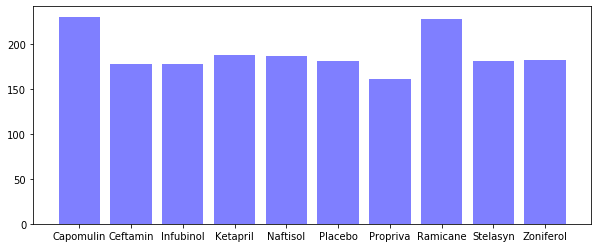

In [46]:

# Define x-axis
x_axis = drug_regimens
# Create a bar chart based upon the above data
plt.figure(figsize=(10,4))
plt.bar(x_axis, regimen_count, color='b', alpha=0.5, align="center")

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
 
gender_df = pd.DataFrame(merge_table.groupby(["Sex"]).count()).reset_index()
gender_df.head()

,Sex,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [63]:
# Filter the DataFrame down only to those columns to chart
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

,Sex,Count
0,Female,935
1,Male,958


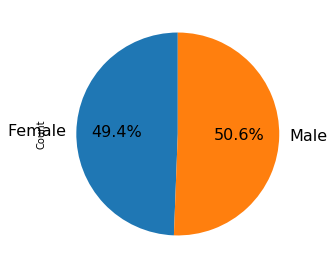

In [71]:
# plot chart
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=gender_df['Sex'], legend = False, fontsize=16)

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = (merge_table.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

[935, 958]

In [76]:
# Labels for the sections of our pie chart
labels = ["Females", "Males"]

# The colors of each section of the pie chart
colors = ["pink", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0)

([<matplotlib.patches.Wedge at 0x2685a20a888>,
 [Text(-1.0504916785005727, -0.5800579569327962, 'Females'),
  Text(0.9629507052921915, 0.5317197938550634, 'Males')],
 [Text(-0.6127868124586674, -0.33836714154413106, '49.4%'),
  Text(0.5252458392502862, 0.2900289784663982, '50.6%')])

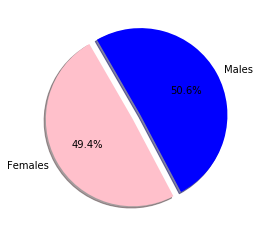

In [79]:
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)

In [81]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [83]:
merge_table.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [98]:
# Sort data by Drug Regime, Mouse ID and Timepoint
sorted_df = merge_table.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
# Select final volume of each mouse 
max_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
max_df.head().reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,9,b128,45,38.982878,2,Capomulin,Female,9,22
1,1710,b742,45,38.939633,0,Capomulin,Male,7,21
2,1834,g288,45,37.074024,1,Capomulin,Male,3,19
3,1824,g316,45,40.159220,2,Capomulin,Female,22,22
4,1867,i557,45,47.685963,1,Capomulin,Female,1,24


In [101]:
volume_list = max_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
volume_list = volume_list["Tumor Volume (mm3)"]
volume_list

0      22.050126
1      23.343598
2      28.430964
3      28.484033
4      29.128472
         ...    
125    75.113288
126    75.123690
127    75.294936
128    76.668817
129    78.567014
Name: Tumor Volume (mm3), Length: 130, dtype: float64

In [104]:
# quartile calculations - hmmmmm not happy with the results here
quartiles = volume_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 40.6583443125
The upper quartile of tumor volume is: 68.8702959775
The interquartile range of tumor volumes is: 28.211951665000008
The the median of tumor volume is: 63.53754596 
Values below -1.6595831850000096 could be outliers.
Values above 111.18822347500002 could be outliers.


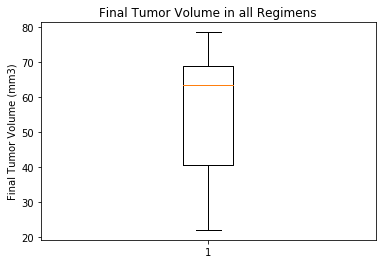

In [106]:
# Example outlier plot of final total volume
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in all Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(volume_list)
plt.show()